<a href="https://colab.research.google.com/github/Shiyasalloor/Deep-Learning-Lab/blob/main/Set_1_Question_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Image:


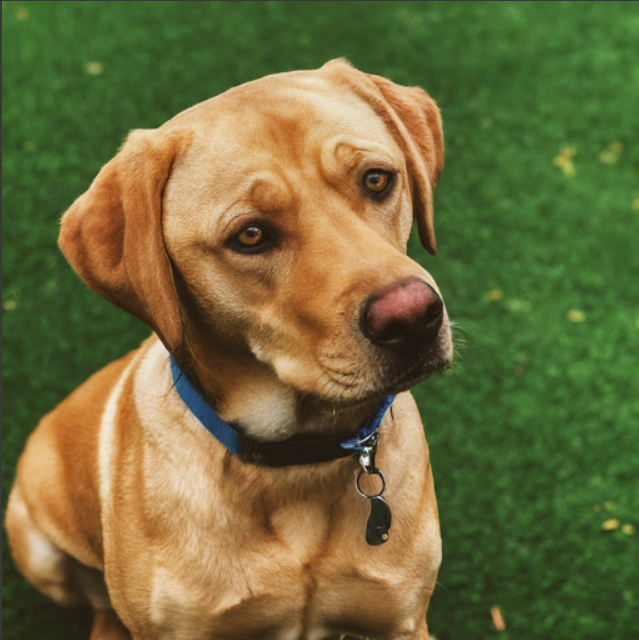

Applying histogram equalization to Y channel in YCrCb space...
Equalized Image:


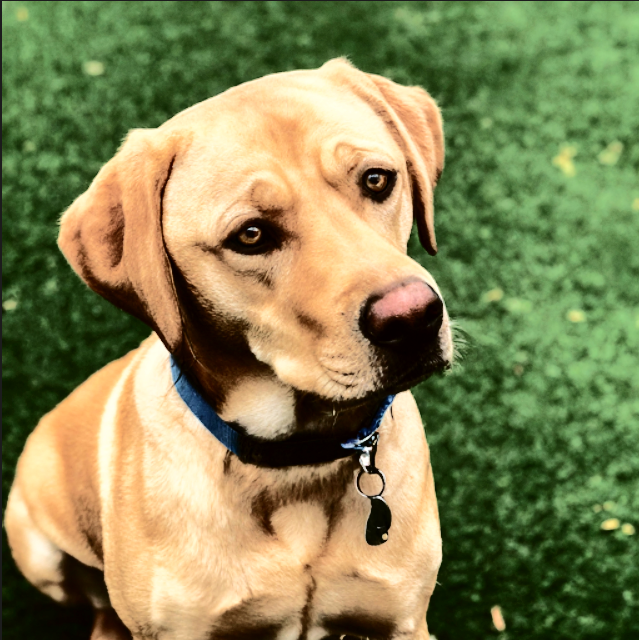

/tmp/ipython-input-1-4271639130.py:52: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(y.ravel(), 256, [0, 256], color='gray')
/tmp/ipython-input-1-4271639130.py:55: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(y_eq.ravel(), 256, [0, 256], color='black')


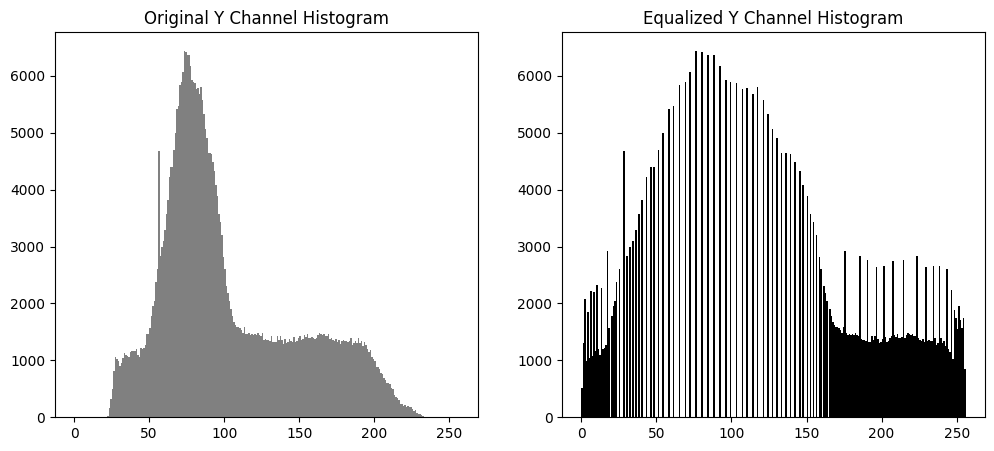

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files

image_path = 'input.png'
image = cv2.imread(image_path)

if image is None:
    print("Failed to load the image.")
else:
    print("Original Image:")
    cv2_imshow(image)

    # Check if grayscale
    if len(image.shape) == 2 or image.shape[2] == 1:
        # Grayscale image
        gray = image
        equalized = cv2.equalizeHist(gray)

        print("Equalized Image:")
        cv2_imshow(equalized)

        # Plot histograms
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.title("Original Histogram")
        plt.hist(gray.ravel(), 256, [0, 256], color='gray')
        plt.subplot(1, 2, 2)
        plt.title("Equalized Histogram")
        plt.hist(equalized.ravel(), 256, [0, 256], color='black')
        plt.show()

    else:
        # Color image
        print("Applying histogram equalization to Y channel in YCrCb space...")

        ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
        y, cr, cb = cv2.split(ycrcb)
        y_eq = cv2.equalizeHist(y)
        ycrcb_eq = cv2.merge((y_eq, cr, cb))
        color_eq = cv2.cvtColor(ycrcb_eq, cv2.COLOR_YCrCb2BGR)

        print("Equalized Image:")
        cv2_imshow(color_eq)

        # Plot histogram of Y channel
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.title("Original Y Channel Histogram")
        plt.hist(y.ravel(), 256, [0, 256], color='gray')
        plt.subplot(1, 2, 2)
        plt.title("Equalized Y Channel Histogram")
        plt.hist(y_eq.ravel(), 256, [0, 256], color='black')
        plt.show()
